# Class project

### 1. Build a Pokemon classifier system using CNN
You can get the data from: https://www.kaggle.com/lantian773030/pokemonclassification


In [0]:
# import os
# !pip install -q kaggle

# os.environ['KAGGLE_USERNAME'] = 'nuttrawitra' 
# os.environ['KAGGLE_KEY'] = '831c5dd1a9d4dc10d7856c05db8dfe5d' 
# ! kaggle datasets download -d lantian773030/pokemonclassification

# ! unzip pokemonclassification.zip

In [0]:
import os, sys

fullpath = []
path = "/content/PokemonData"
dirs = os.listdir( path )

for files in dirs:
    file = os.listdir( path + "/" + files )
    img_path = []
    for img in file:  
          img_path.append( path + "/" + files + "/" + img )
    fullpath.append(img_path) 

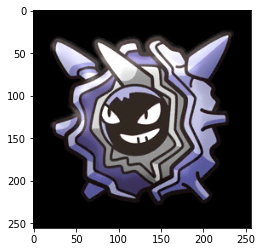

(256, 256, 3)


In [0]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np

img = mpimg.imread(fullpath[10][2]).astype('float32') / 255
plt.imshow(img)
plt.show()
print(img.shape)

In [0]:
import random

path = []
pokemon_y = []
for i in range(0,len(fullpath)):
    for p in fullpath[i]:
        try:
            img_p = mpimg.imread(p)
            path.append(p)
        except:
            pass
random.shuffle(path)
for p in path:
    pokemon_y.append(p.split('/')[-2])

In [0]:
# get an input
import numpy as np
from skimage.transform import resize

pokemon_x = []
for i in range(0,len(path)):
    img_p = mpimg.imread(path[i])
    img_p = resize(img_p, (128,128,3))
    pokemon_x.append(img_p)
print("done")

done


In [0]:
import pickle
from sklearn.preprocessing import LabelBinarizer 
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras import Input, Sequential, Model
from tensorflow.keras.layers import Conv2D, Activation, MaxPool2D, Flatten, Dense, BatchNormalization, UpSampling2D, AveragePooling2D, Reshape, Dropout

In [0]:
lb = LabelBinarizer()

pokeon_x = np.array(pokemon_x)
pokemon_y = np.array(pokemon_y)
pokemon_y = lb.fit_transform(pokemon_y)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(pokemon_x, pokemon_y, test_size=0.2, random_state=5)

In [0]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5454, 128, 128, 3)
(5454, 150)
(1364, 128, 128, 3)
(1364, 150)


In [6]:
# 128 - 64 - 32 - 64 - 128 
# using Keras

encoder_input = Input(shape = (128,128,3), name='encoder_input')
encoder = Conv2D(64, (3,3), strides=1, padding="same")(encoder_input)
encoder = BatchNormalization()(encoder)
encoder = Activation('relu')(encoder)
encoder = AveragePooling2D((2,2), padding="same")(encoder)

encoder = Conv2D(32, (3,3), strides=1, padding="same")(encoder)
encoder = BatchNormalization()(encoder)
encoder = Activation('relu')(encoder)
encoder_output = AveragePooling2D((2,2), padding="same", name='encoder_output')(encoder)

decoder = BatchNormalization()(encoder_output)
decoder = Activation('relu')(decoder)
decoder = UpSampling2D((2, 2))(decoder)

decoder = Conv2D(64, (3,3), strides=1, padding="same")(decoder)
decoder = BatchNormalization()(decoder)
decoder = Activation('relu')(decoder)
decoder = UpSampling2D((2, 2))(decoder)
decoder_output = Conv2D(3, (3,3), strides=1, activation='sigmoid', padding="same", name='decoder_output')(decoder)

autoencoder = Model(encoder_input, decoder_output, name='Autoencoder Model')
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.01))
autoencoder.summary()

Model: "Autoencoder Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 64)      1792      
_________________________________________________________________
batch_normalization_4 (Batch (None, 128, 128, 64)      256       
_________________________________________________________________
activation_4 (Activation)    (None, 128, 128, 64)      0         
_________________________________________________________________
average_pooling2d_1 (Average (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 32)        18464     
_________________________________________________________________
batch_normalization_5 (Batch (None, 64, 64, 32)  

In [0]:
history = autoencoder.fit(x_train, x_train, epochs=25, batch_size=54, validation_data=(x_test, x_test))

Epoch 1/25
101/101 [==============================] - 6s 62ms/step - loss: 0.4457 - val_loss: 0.4935
Epoch 2/25
101/101 [==============================] - 6s 59ms/step - loss: 0.4266 - val_loss: 0.4734
Epoch 3/25
101/101 [==============================] - 6s 60ms/step - loss: 0.4210 - val_loss: 0.5275
Epoch 4/25
101/101 [==============================] - 6s 60ms/step - loss: 0.4186 - val_loss: 0.4319
Epoch 5/25
101/101 [==============================] - 6s 59ms/step - loss: 0.4158 - val_loss: 0.4394
Epoch 6/25
101/101 [==============================] - 6s 60ms/step - loss: 0.4150 - val_loss: 0.4145
Epoch 7/25
101/101 [==============================] - 6s 59ms/step - loss: 0.4153 - val_loss: 0.4590
Epoch 8/25
101/101 [==============================] - 6s 59ms/step - loss: 0.4141 - val_loss: 0.4142
Epoch 9/25
101/101 [==============================] - 6s 59ms/step - loss: 0.4130 - val_loss: 0.4196
Epoch 10/25
101/101 [==============================] - 6s 59ms/step - loss: 0.4133 - val_lo

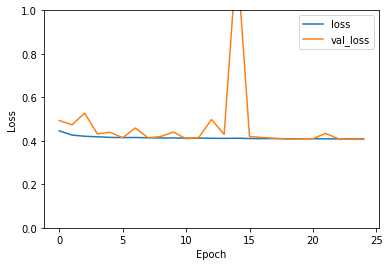

In [0]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0,1])
plt.legend(loc='upper right')

In [0]:
autoencoder.save('project2_model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: project2_model/assets


In [3]:
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer(name="encoder_output").output, name = 'Encoder Model')
encoder.summary()

Model: "Encoder Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 128, 128, 64)      1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 64)      256       
_________________________________________________________________
activation (Activation)      (None, 128, 128, 64)      0         
_________________________________________________________________
average_pooling2d (AveragePo (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        18464     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 32)      

In [0]:
autoencoder_output = autoencoder.predict(x_test)
encoded_states = encoder.predict(x_test)

In [0]:
encoded_states.shape

(1364, 32, 32, 32)

In [0]:
print(x_test[0])
print('the image shape : ',x_test[0].shape)
print('---------')
print(encoded_states[0])
print('the image shape : ',encoded_states[0].shape)
print('---------')
print(autoencoder_output[0])
print('the image shape : ',autoencoder_output[0].shape)

[[[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 ...

 [[0.32752374 0.31932636 0.33415479]
  [0.23672066 0.20005744 0.25955499]
  [0.20843099 0.16553309 0.2341299 ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.406857   0.39086435 0.42738205]
  [0.19821155 0.1550743  0.229946  ]


In [0]:
print('the autoencoder image input shape : ',x_test[0].shape)
print('the encoder image output shape  : ',encoded_states[0].shape)
print('the autoencoder image output shape : ',autoencoder_output[0].shape)

the autoencoder image input shape :  (128, 128, 3)
the encoder image output shape  :  (32, 32, 32)
the autoencoder image output shape :  (128, 128, 3)


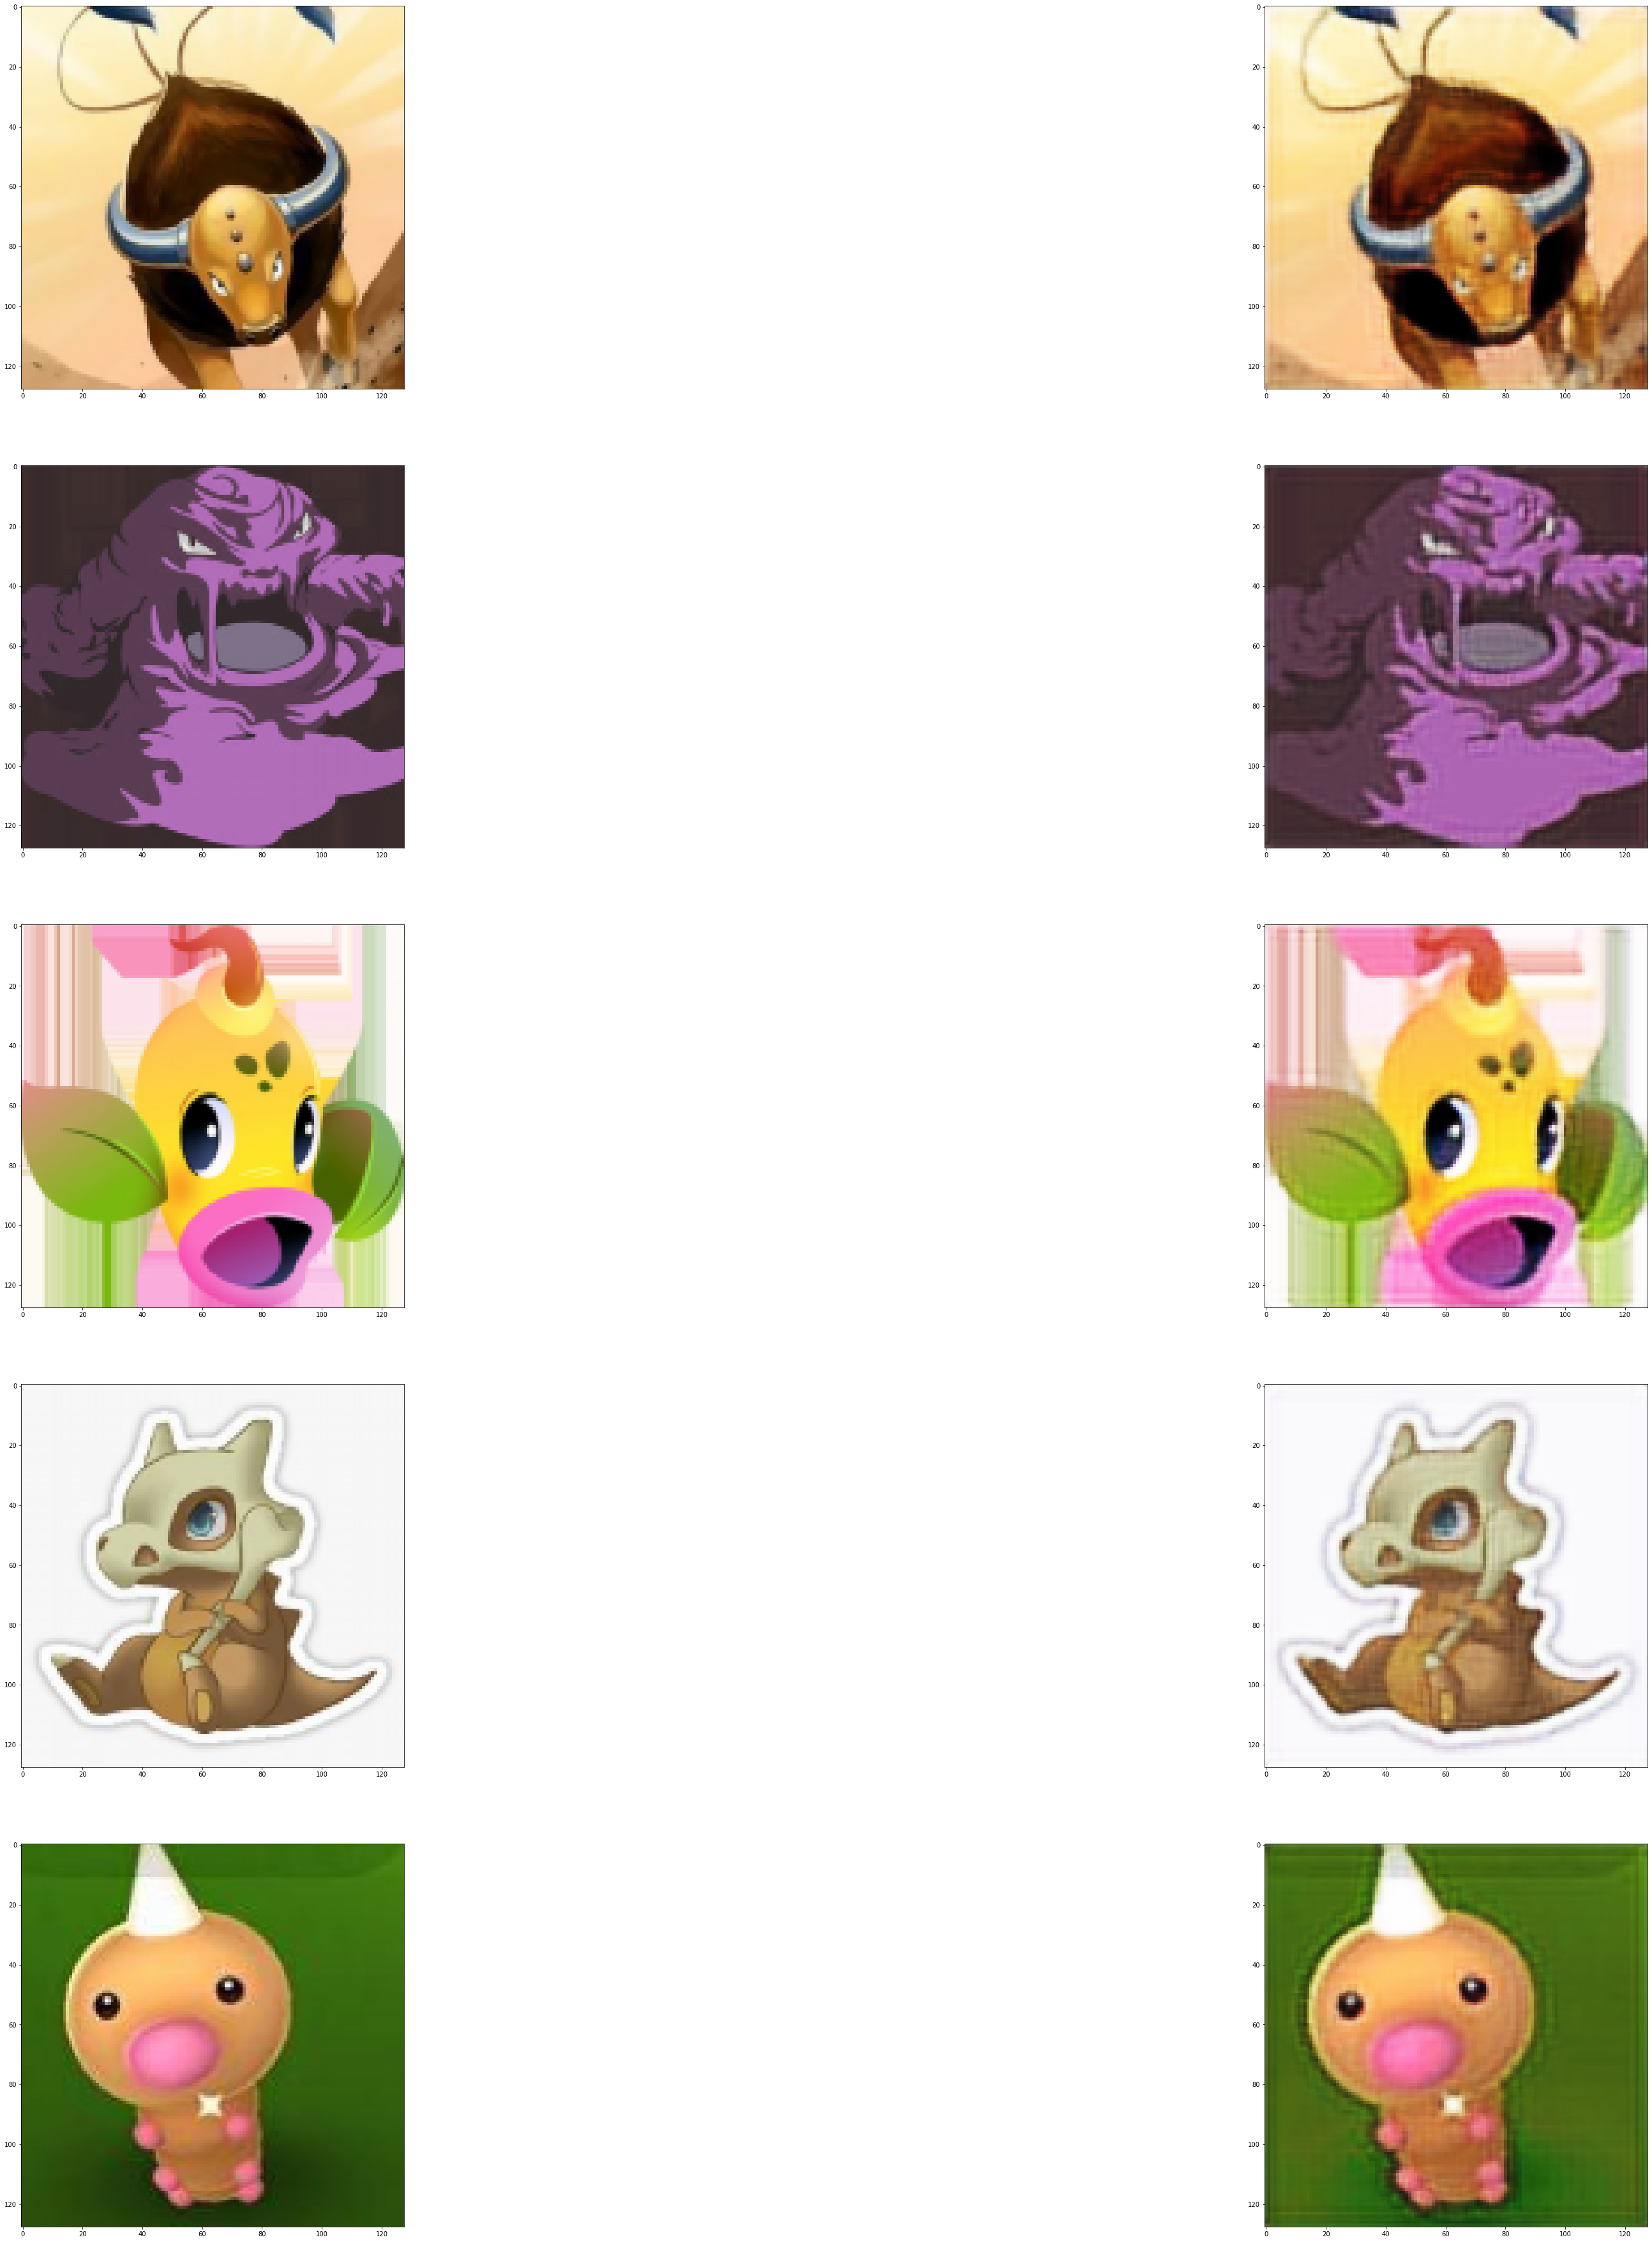

In [0]:
rows = 5
columns = 2
fig = plt.figure(figsize=(64,64))
for c in range(1, rows*columns+1,2):
  axs1 = fig.add_subplot(5, 2, c)
  axs2 = fig.add_subplot(5, 2, c+1)
  axs1.imshow(x_test[c])
  axs2.imshow(autoencoder_output[c])